# Set Up

#### Import Libraries

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Training Data

In [440]:
rawdata = pd.read_csv("train.csv")



# 1. Data Analysis and Description

Create relevant_data as a variable to focus on Gender, Age, Class, Survived

In [600]:
relevant_data = rawdata[['Sex', 'Survived',"Age","Pclass","PassengerId"]]
relevant_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [443]:
relevant_data.head()

,Sex,Survived,Age,Pclass,PassengerId
0,male,0,22.0,3,1
1,female,1,38.0,1,2
2,female,1,26.0,3,3
3,female,1,35.0,1,4
4,male,0,35.0,3,5


### 1.1 Females vs. Males

In [456]:
## Females and males
table_groupby_sex = relevant_data.groupby("Sex").count()


In [457]:
table_groupby_sex

,Survived,Age,Pclass,PassengerId
Sex,,,,
female,314,261,314,314
male,577,453,577,577


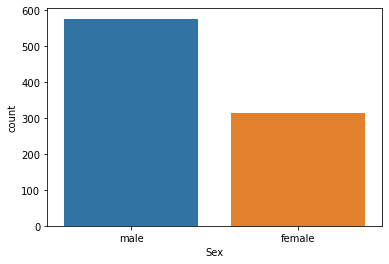

In [472]:
ax = sns.countplot(x="Sex", data=relevant_data)

In [538]:
females = relevant_data[relevant_data["Sex"] == "female"]
males = relevant_data[relevant_data["Sex"] == "male"]




In [550]:
## All female Guests

female_guests = females["Sex"].count()


female_guests

314

In [1066]:
## Survived Females
females_srvvd = females["Survived"].mean()*100

In [554]:
## All male Guests
male_guests = males["Sex"].count()
male_guests

577

In [1068]:
## Survived Males

males_srvvd = males["Survived"].mean()*100

In [1069]:
## Create Table for description

table_for_description_male_female = pd.DataFrame ({
                    
                   'Gender': ['male', 'female'],
                   'Sum Persons': [male_guests,female_guests],
                   'Chance of Survival': [males_srvvd,females_srvvd]

                                                 })
table_for_description_male_female

,Gender,Sum Persons,Chance of Survival
0,male,577,18.890815
1,female,314,74.203822


In [1070]:
## Create Table for plotting

table_for_plotting_male_female = pd.DataFrame ({
                    
                   'Gender': ['male', 'female'],
                   'Chance of Survival': [males_srvvd,females_srvvd]

                                                 })
table_for_plotting_male_female

,Gender,Chance of Survival
0,male,18.890815
1,female,74.203822


<AxesSubplot:xlabel='Gender'>

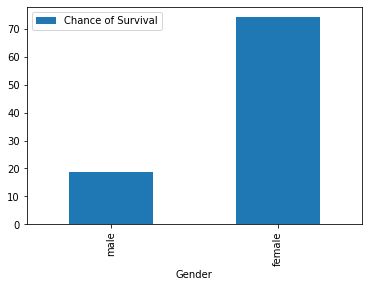

In [1071]:
table_for_plotting_male_female.plot.bar(x="Gender")

### 1.2 Differences in Classes

In [1072]:
table_groupby_Pclass = relevant_data.groupby("Pclass").count()
table_groupby_Pclass["Sex"]

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64

In [1073]:
x = relevant_data[relevant_data["Pclass"] == 1]
y = relevant_data[relevant_data["Pclass"] == 2]
z = relevant_data[relevant_data["Pclass"] == 3]

ppl_1class = x["Sex"].count()
ppl_2class = y["Sex"].count()
ppl_3class = z["Sex"].count()

share_ppl_1class = ppl_1class/891*100
share_ppl_2class = ppl_2class/891*100
share_ppl_3class = ppl_3class/891*100


table_ppl_class = pd.DataFrame(
            {
                "Class": [1,2,3],             
                "Ppl": [ppl_1class, ppl_2class, ppl_3class ],
                 "Share": [share_ppl_1class,share_ppl_2class,share_ppl_3class]   
             },
                    index=['1. Class', '2. Class', '3. Class']
                                )
table_ppl_class



,Class,Ppl,Share
1. Class,1,216,24.242424
2. Class,2,184,20.650954
3. Class,3,491,55.106622


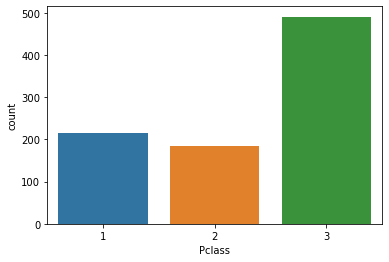

In [1074]:
ax = sns.countplot(x="Pclass", data=relevant_data)

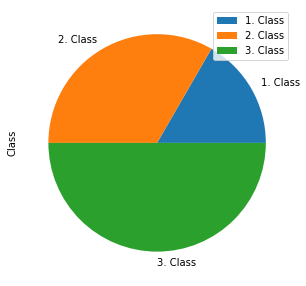

In [1075]:
plot = table_ppl_class.plot.pie(y="Class", figsize=(5,5))

### 1.3 Differences in Age

#### Age Groups

In [1082]:
## Sum & Mean Survived from Age 0 - 10
y = rawdata[rawdata["Age"] < 11]
count_range_0_10 = y["PassengerId"].count()
sum_srvvd_range_0_10 = y["Survived"].sum()
mean_srvvd_range_0_10 = y["Survived"].mean()*100
count_srrvd_range_0_10= y["Survived"].count()
mean_srvvd_range_0_10

59.375

In [1083]:
## Sum & Mean Survived from Age 11 - 20
x = rawdata[rawdata["Age"] >= 11]
y = x[x["Age"] < 21]
count_range_11_20 = y["PassengerId"].count()
sum_srvvd_range_11_20 = y["Survived"].sum()
mean_srvvd_range_11_20 = y["Survived"].mean()*100
count_srvvd_range_11_20 = y["Survived"].count()
count_srvvd_range_11_20


116

In [1078]:
sum_srvvd_range_11_20

44

In [1080]:
## Sum & Mean Survived from Age 21 - 30
x = rawdata[rawdata["Age"] >= 21]
y = x[x["Age"] < 31]
count_range_21_30 = y["PassengerId"].count()
sum_srvvd_range_21_30 = y["Survived"].sum()
mean_srvvd_range_21_30 = y["Survived"].mean()*100
count_range_21_30

231

In [1084]:
## Sum & Mean Survived from Age 31 - 40
x = rawdata[rawdata["Age"] >= 31]
y = x[x["Age"] < 41]
count_range_31_40 = y["PassengerId"].count()
sum_srvvd_range_31_40 = y["Survived"].sum()
mean_srvvd_range_31_40 = y["Survived"].mean()*100
count_range_31_40

155

In [1085]:
## Sum & Mean Survived from Age 41 - 50
x = rawdata[rawdata["Age"] >= 41]
y = x[x["Age"] < 51]
count_range_41_50 = y["PassengerId"].count()
sum_srvvd_range_41_50 = y["Survived"].sum()
mean_srvvd_range_41_50 = y["Survived"].mean()*100
count_range_41_50

84

In [1086]:
## Sum & Mean Survived from Age 51 - 60
x = rawdata[rawdata["Age"] >= 51]
y = x[x["Age"] < 61]
count_range_51_60 = y["PassengerId"].count()
sum_srvvd_range_51_60 = y["Survived"].sum()
mean_srvvd_range_51_60 = y["Survived"].mean()*100
count_range_51_60

42

In [1087]:
## Sum & Mean Survived from Age 61 - 70
x = rawdata[rawdata["Age"] >= 61]
y = x[x["Age"] < 71]
count_range_61_70 = y["PassengerId"].count()
sum_srvvd_range_61_70 = y["Survived"].sum()
mean_srvvd_range_61_70 = y["Survived"].mean()*100
count_range_61_70

18

In [1088]:
## Sum & Mean Survived from Age 71 - 80
y = rawdata[rawdata["Age"] >= 71]
count_range_71_100 = y["PassengerId"].count()
sum_srvvd_range_71_100 = y["Survived"].sum()
mean_srvvd_range_71_100 = y["Survived"].mean()*100
count_range_71_100

4

In [1089]:
# Create table for results
table_for_description_age_groups = pd.DataFrame({
                    'Age Group': ['0-10','11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100'],
                   'Sum Persons': [count_range_0_10,count_range_11_20, count_range_21_30, count_range_31_40, count_range_41_50, count_range_51_60, count_range_61_70, count_range_71_100],
                   'Chance of Survival': [mean_srvvd_range_0_10, mean_srvvd_range_11_20, mean_srvvd_range_21_30, mean_srvvd_range_31_40, mean_srvvd_range_41_50, mean_srvvd_range_51_60, mean_srvvd_range_61_70, mean_srvvd_range_71_100]
                                                    
                                  })
table_for_description_age_groups

,Age Group,Sum Persons,Chance of Survival
0,0-10,64,59.375000
1,11-20,116,37.931034
2,21-30,231,36.363636
3,31-40,155,44.516129
4,41-50,84,39.285714
5,51-60,42,40.476190
6,61-70,18,22.222222
7,71-100,4,25.000000


<AxesSubplot:xlabel='Age Group'>

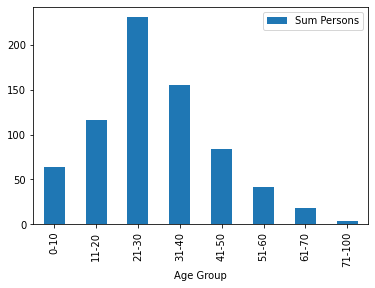

In [1090]:
table_for_description_age_groups.plot.bar(x="Age Group", y="Sum Persons")

### 1. Class male/female

In [1091]:
table_first_class = relevant_data[relevant_data["Pclass"] == 1]

In [1092]:
table_first_class

,Sex,Survived,Age,Pclass,PassengerId
1,female,1,38.0,1,2
3,female,1,35.0,1,4
6,male,0,54.0,1,7
11,female,1,58.0,1,12
23,male,1,28.0,1,24
...,...,...,...,...,...
871,female,1,47.0,1,872
872,male,0,33.0,1,873
879,female,1,56.0,1,880
887,female,1,19.0,1,888


In [1093]:
Pclass1_gender = table_first_class.groupby("Sex").count()
Pclass1_gender

,Survived,Age,Pclass,PassengerId
Sex,,,,
female,94,85,94,94
male,122,101,122,122


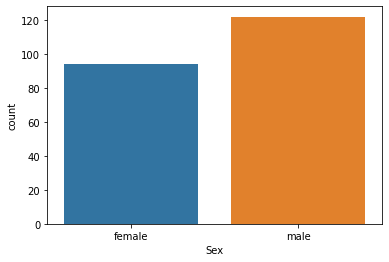

In [1094]:
countplot_sex_Pclass1 = sns.countplot(x="Sex", data=table_first_class)

In [1095]:
table_srvvd_first_class = table_first_class[table_first_class["Survived"] == 1] 

In [1098]:
mean_srvvd_first_class = table_first_class["Survived"].mean()*100
mean_srvvd_first_class

62.96296296296296

In [1099]:
table_overview = pd.DataFrame({'Class': ['First', 'Second','Third'],
                   'Number of ppl': [216, 184, 491],
                   'Chance of Survival': [mean_srvvd_first_class, mean_srvvd_second_class, mean_srvvd_second_class] ,                          
                    'Males':[1,2,3],
                   'Females':[1,2,3] ,
                   'Dummy2':[1,2,3] ,
                   'Dummy3':[1,2,3] 
                  })
table_overview


,Class,Number of ppl,Chance of Survival,Males,Females,Dummy2,Dummy3
0,First,216,62.962963,1,1,1,1
1,Second,184,0.472826,2,2,2,2
2,Third,491,0.472826,3,3,3,3


### 2. Class male/female

In [717]:
table_second_class = relevant_data[relevant_data["Pclass"] == 2]
Pclass2_gender = table_second_class.groupby("Sex").count()
Pclass2_gender

,Survived,Age,Pclass,PassengerId
Sex,,,,
female,76,74,76,76
male,108,99,108,108


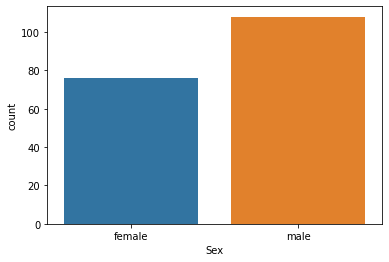

In [490]:
ay = sns.countplot(x="Sex", data=table_second_class)

In [688]:
table_srvvd_second_class = table_second_class[table_second_class["Survived"] == 1]

In [689]:
table_srvvd_second_class.count()

Sex            87
Survived       87
Age            83
Pclass         87
PassengerId    87
dtype: int64

In [1100]:
mean_srvvd_second_class = table_second_class["Survived"].mean()*100

In [1101]:
mean_srvvd_second_class

47.28260869565217

### 3. Class male/female

In [715]:
table_third_class = relevant_data[relevant_data["Pclass"] == 3]
Pclass3_gender = table_third_class.groupby("Sex").count()
Pclass3_gender

,Survived,Age,Pclass,PassengerId
Sex,,,,
female,144,102,144,144
male,347,253,347,347


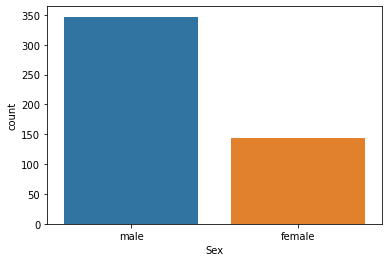

In [509]:
az = sns.countplot(x="Sex", data=table_third_class)

In [512]:
table_srvvd_third_class = table_third_class[table_third_class["Survived"] == 1]
table_srvvd_third_class.count()

Sex            119
Survived       119
Age             85
Pclass         119
PassengerId    119
dtype: int64

In [1102]:
mean_srvvd_third_class = table_third_class["Survived"].mean()*100
mean_srvvd_third_class

24.236252545824847

# Chance of Survival for Ticket Class

In [1103]:
Chance_srvvd_Pclass = pd.DataFrame({'Class': ['First', 'Second','Third'],
                   'Number of ppl': [216, 184, 491],
                   'Chance of Survival': [mean_srvvd_first_class, mean_srvvd_second_class, mean_srvvd_second_class]                           
                    
                  })
Chance_srvvd_Pclass



,Class,Number of ppl,Chance of Survival
0,First,216,62.962963
1,Second,184,47.282609
2,Third,491,47.282609


<AxesSubplot:xlabel='Class'>

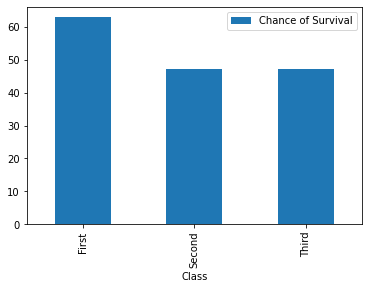

In [1104]:
Chance_srvvd_Pclass.plot.bar(x="Class", y="Chance of Survival")

## Overview Table

In [1105]:
overview_table = pd.DataFrame({'Class': ['First', 'Second','Third'],
                   'Number of ppl': [216, 184, 491],
                    'Share':[share_ppl_1class,share_ppl_2class,share_ppl_3class] ,
                   'Chance of Survival': [mean_srvvd_first_class, mean_srvvd_second_class, mean_srvvd_second_class] ,                          
                    'Males':[1,2,3],
                   'Females':[1,2,3] ,
                   'Dummy3':[1,2,3] 
                  })
overview_table


,Class,Number of ppl,Share,Chance of Survival,Males,Females,Dummy3
0,First,216,24.242424,62.962963,1,1,1
1,Second,184,20.650954,47.282609,2,2,2
2,Third,491,55.106622,47.282609,3,3,3


In [1106]:
ppl_1class
ppl_2class 
ppl_3class 

share_ppl_1class 
share_ppl_2class 
share_ppl_3class 

55.106621773288445

# Chance of Survival for Gender in Pclass = 1

### Sex in Pclass = 1

<AxesSubplot:xlabel='Sex', ylabel='count'>

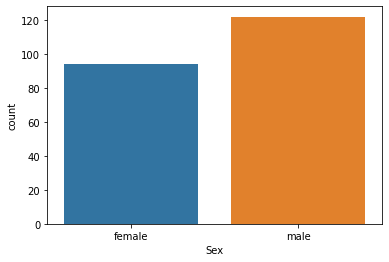

In [1107]:
plot_pclass1_sex = sns.countplot(x="Sex", data=table_first_class)

plot_pclass1_sex

### Age in Pclass = 1

### Chance of Survival for Gender

In [1110]:
## Get every male passenger from the first class
table_males_first_class = table_first_class[table_first_class["Sex"] == "male"]
table_males_first_class

## Create the chance of survival for every male in class 1
males_srvvd_Pclass1 = table_males_first_class["Survived"].mean()*100
males_srvvd_Pclass1

## Get every female passenger from the first class
table_females_first_class = table_first_class[table_first_class["Sex"] == "female"]
table_females_first_class

## Create the chance of survival for every female in class 1
females_srvvd_Pclass1 = table_females_first_class["Survived"].mean()*100
females_srvvd_Pclass1

## Create table for plotting
table_Pclass1 = pd.DataFrame ( {
    "Sex": ["Male", "Female"],
    "Chance of Survival": [males_srvvd_Pclass1, females_srvvd_Pclass1]   
           
}
)
table_Pclass1





,Sex,Chance of Survival
0,Male,36.885246
1,Female,96.808511


<AxesSubplot:xlabel='Sex'>

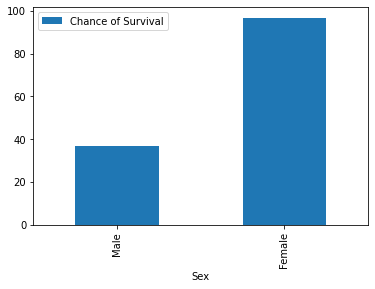

In [1111]:
## Plot Table

table_Pclass1.plot.bar(x="Sex")

# Chance of Survival for Gender in Pclass = 2

### Sex in Pclass = 2

<AxesSubplot:xlabel='Sex', ylabel='count'>

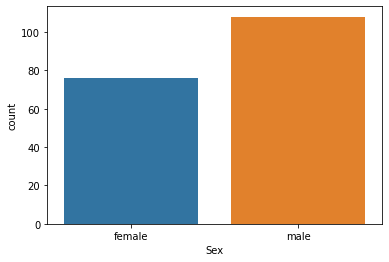

In [830]:
plot_pclass2_sex = sns.countplot(x="Sex", data=table_second_class)

plot_pclass2_sex

### Age in Pclass = 2

### Chance of Survival for Gender

In [1112]:
## Get every male passenger from the second class
table_males_second_class = table_second_class[table_second_class["Sex"] == "male"]


## Create the chance of survival for every male in class 2
males_srvvd_Pclass2 = table_males_second_class["Survived"].mean()*100


## Get every female passenger from the second class
table_females_second_class = table_second_class[table_second_class["Sex"] == "female"]


## Create the chance of survival for every female in class 1
females_srvvd_Pclass2 = table_females_second_class["Survived"].mean()*100


## Create table for plotting
table_Pclass2 = pd.DataFrame ( {
    "Sex": ["Male", "Female"],
    "Chance of Survival": [males_srvvd_Pclass2, females_srvvd_Pclass2]   
           
}
)
table_Pclass2





,Sex,Chance of Survival
0,Male,15.740741
1,Female,92.105263


<AxesSubplot:xlabel='Sex'>

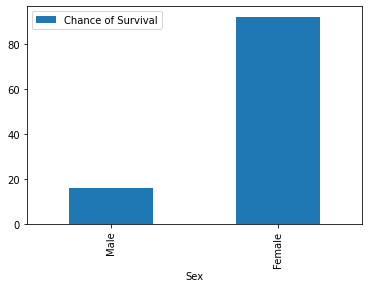

In [1113]:
## Plot Table

table_Pclass2.plot.bar(x="Sex")

# Chance of Survival for Gender in Pclass = 3

### Sex in Pclass = 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

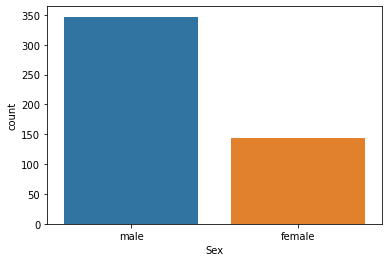

In [833]:
plot_pclass3_sex = sns.countplot(x="Sex", data=table_third_class)

plot_pclass3_sex

### Age in Pclass = 3

### Chance of Survival for Gender

In [1114]:
## Get every male passenger from the third class
table_males_third_class = table_third_class[table_third_class["Sex"] == "male"]


## Create the chance of survival for every male in class 3
males_srvvd_Pclass3 = table_males_third_class["Survived"].mean()*100


## Get every female passenger from the third class
table_females_third_class = table_third_class[table_third_class["Sex"] == "female"]


## Create the chance of survival for every female in class 3
females_srvvd_Pclass3 = table_females_third_class["Survived"].mean()*100


## Create table for plotting
table_Pclass3 = pd.DataFrame ( {
    "Sex": ["Male", "Female"],
    "Chance of Survival": [males_srvvd_Pclass3, females_srvvd_Pclass3]   
           
}
)
table_Pclass3





,Sex,Chance of Survival
0,Male,13.544669
1,Female,50.000000


<AxesSubplot:xlabel='Sex'>

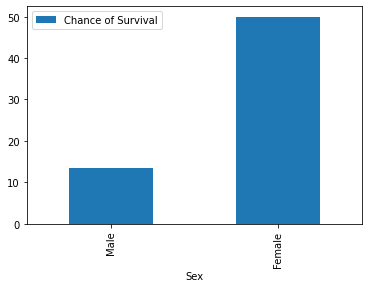

In [1115]:
## Plot Table

table_Pclass3.plot.bar(x="Sex")

# Compare Survival Chance in Class and Gender

In [1116]:
### Gender Distribution for every Class

#### Males

In [1117]:
Chance_srvvd_Pclass_males = pd.DataFrame({'Class': ['First', 'Second','Third'],
                   # 'Number of ppl': [216, 184, 491], --> bad numbers, needs to be created
                   'Chance of Survival': [males_srvvd_Pclass1,males_srvvd_Pclass2,males_srvvd_Pclass3]                           
                     },
                    index=['1. Class', '2. Class', '3. Class']                                        
                                        
                                        )
Chance_srvvd_Pclass_males



,Class,Chance of Survival
1. Class,First,36.885246
2. Class,Second,15.740741
3. Class,Third,13.544669


<AxesSubplot:xlabel='Class'>

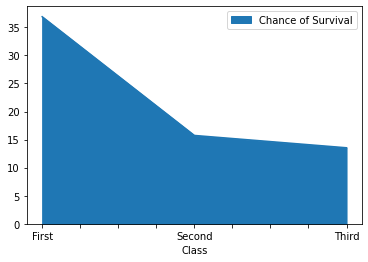

In [1118]:
Chance_srvvd_Pclass_males.plot.area(x="Class", y="Chance of Survival")

#### Females

In [1119]:
Chance_srvvd_Pclass_females = pd.DataFrame({'Class': ['First', 'Second','Third'],
                   # 'Number of ppl': [216, 184, 491], --> bad numbers, needs to be created
                   'Chance of Survival': [females_srvvd_Pclass1,females_srvvd_Pclass2,females_srvvd_Pclass3]                           
                     },
                    index=['1. Class', '2. Class', '3. Class']                                        
                                        
                                        )
Chance_srvvd_Pclass_females



,Class,Chance of Survival
1. Class,First,96.808511
2. Class,Second,92.105263
3. Class,Third,50.000000


<AxesSubplot:xlabel='Class'>

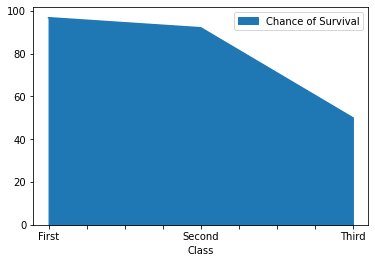

In [1120]:
Chance_srvvd_Pclass_females.plot.area(x="Class", y="Chance of Survival")

# Chance of Survival Ticket Class

# Chance of Survival Age Group

In [1121]:
# Create table for results
table_for_description = pd.DataFrame({
             #   'Age Group': ["0-10","11-20", "21-30", "31-40", "41-50", mean_srvvd_range_51_60, mean_srvvd_range_61_70, mean_srvvd_range_71_100],
               'Age Group': ['0-10', '11-20', '21-30','31-40', '41-50', '51-60', '61-70', '71-100'],
               #  'Sum Persons': [sum_srvvd_range_0_10,count_srvvd_range_11_20, count_srvvd_range_21_30, count_srvvd_range_31_40, count_srvvd_range_41_50, count_srvvd_range_51_60, count_srvvd_range_61_70, count_srvvd_range_71_100],
                  'Chance of Survival': [mean_srvvd_range_0_10,mean_srvvd_range_11_20, mean_srvvd_range_21_30, mean_srvvd_range_31_40, mean_srvvd_range_41_50, mean_srvvd_range_51_60, mean_srvvd_range_61_70, mean_srvvd_range_71_100]
                                                    
                                  })
table_for_description

,Age Group,Chance of Survival
0,0-10,59.375000
1,11-20,37.931034
2,21-30,36.363636
3,31-40,44.516129
4,41-50,39.285714
5,51-60,40.476190
6,61-70,22.222222
7,71-100,25.000000


<AxesSubplot:xlabel='Age Group'>

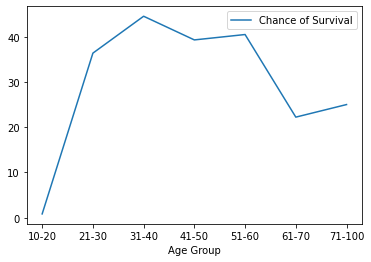

In [1124]:
# Create table for plotting
table_for_plotting_agegroup_chance_survval = pd.DataFrame({'Age Group': ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100'],
                                    'Chance of Survival': [mean_srvvd_range_10_20, mean_srvvd_range_21_30, mean_srvvd_range_31_40, mean_srvvd_range_41_50, mean_srvvd_range_51_60, mean_srvvd_range_61_70, mean_srvvd_range_71_100]
                                                    
                                  })
table_for_plotting_agegroup_chance_survval.plot(x='Age Group',y='Chance of Survival', kind="line")

<AxesSubplot:xlabel='Age Group'>

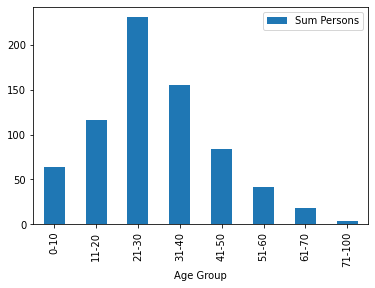

In [964]:
table_for_description_age_groups.plot.bar(x="Age Group", y="Sum Persons")

In [ ]:
table_for_plotting_agegroup_chance_survval
table_for_description_age_groups

In [1028]:
table_for_description_age_groups.head()

,Age Group,Sum Persons,Chance of Survival
0,0-10,64,0.593750
1,11-20,116,0.379310
2,21-30,231,0.363636
3,31-40,155,0.445161
4,41-50,84,0.392857


<AxesSubplot:xlabel='Age Group'>

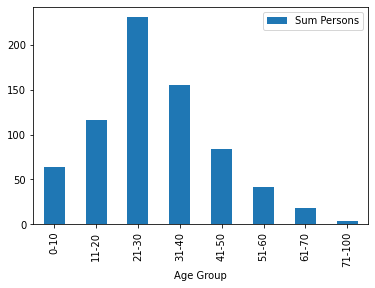

In [1064]:

testtable1= pd.DataFrame(table_for_description_age_groups)
testtable1.plot(x='Age Group', y='Sum Persons', kind='bar')

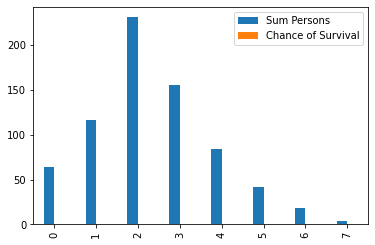

# Chance of Survival for Gender

In [863]:
## Sum, count & mean Survived for Gender = male
x = rawdata[rawdata["Sex"] == "male"]
count_srvvd_male = x["Survived"].count()
sum_srvvd_male = x["Survived"].sum()
mean_srvvd_male = x["Survived"].mean()
count_srvvd_male

577

In [864]:
## Sum, count & mean Survived for Gender = female
x = rawdata[rawdata["Sex"] == "female"]
count_srvvd_female = x["Survived"].count()
sum_srvvd_female = x["Survived"].sum()
mean_srvvd_female = x["Survived"].mean()
count_srvvd_female

314

In [865]:
# Create table for results
table_for_description_Sex = pd.DataFrame({'Sex': ['male', 'female'],
                   'Sum Persons': [ count_srvvd_male, count_srvvd_female],
                   'Chance of Survival': [ mean_srvvd_male, mean_srvvd_female]
                                                    
                                  })
table_for_description_Sex

,Sex,Sum Persons,Chance of Survival
0,male,577,0.188908
1,female,314,0.742038


<AxesSubplot:xlabel='Sex'>

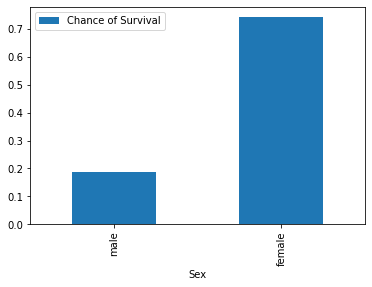

In [866]:
# Create table for plottig
table_for_plotting_Sex = pd.DataFrame({'Sex': ['male', 'female'],
                                      'Chance of Survival': [ mean_srvvd_male, mean_srvvd_female]
                                                    
                                  })
table_for_plotting_Sex.plot.bar(x="Sex", y="Chance of Survival")